In [6]:
import os
from datetime import datetime
from pathlib import Path
from src.model_builder import RobinMobilenetV2
from src.helpers import create_dir_if_not_exist, split_train_valid_test
from src.pipelines import create_input_pipelines, \
    train_new_model, fine_tune_model, evaluate_model
items_data_dir=Path(os.getcwd())/'data/items'

items_images_dir= items_data_dir/'images'
items_train_dir= items_data_dir/'train'
items_valid_dir= items_data_dir/'valid'
items_test_dir= items_data_dir/'test'

model_dir = Path(os.getcwd())/'models'
save_model_items_dir = model_dir/'items'
lite_models_dir = model_dir/'lite'

items_log = Path(os.getcwd())/'logs'/'items'

project_dir=[
  items_images_dir,
  items_train_dir,
  items_valid_dir,
  items_test_dir,
  save_model_items_dir,
  lite_models_dir,
  items_log
]

create_dir_if_not_exist(project_dir)

Scanning for necessary directories
Found directory /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/images
Creating '/Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/train' directory at project's root
Creating '/Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/valid' directory at project's root
Creating '/Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/test' directory at project's root
Found directory /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/models/items
Found directory /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/models/lite
Creating '/Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/logs/items' directory at project's root


In [7]:
split_train_valid_test(
    items_images_dir,
    items_train_dir,
    items_valid_dir,
    items_test_dir,
    0.7,
    0.15
)

Total images found: 150
Train: 105, Validation: 22, Test: 23
Copying 105 of 150 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/train/food_can
Copying 22 of 150 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/valid/food_can
Copying 23 of 150 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/test/food_can
Total images found: 162
Train: 113, Validation: 24, Test: 25
Copying 113 of 162 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/train/trash
Copying 24 of 162 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/valid/trash
Copying 25 of 162 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/test/trash
Total images found: 425
Train: 297, Validation: 63, Test: 65
Copying 297 of 425 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/train/carton
Copying 63 of 425 to /Users/jontan_paloit/Dev/Lab/ROBin-Model-Training/data/items/valid/carton
Copying 65 of 425 to /Users/jontan_paloit/Dev/Lab/ROB

In [8]:
items_hyperparams = {
    "img_size": (160, 160),
    "channels": 3,
    "batch_size": 32,
    "base_learning_rate": 0.0001,
    "initial_epochs": 1,
    "fine_tune_from": 100,
    "fine_tune_epochs": 1
}

items_train_ds, items_validation_ds, items_test_ds = create_input_pipelines(
    [items_train_dir, items_valid_dir, items_test_dir],
    items_hyperparams
)

items_dataset = {
    "train_ds": items_train_ds,
    "validate_ds": items_validation_ds,
    "test_ds": items_test_ds,
    "class_names": items_train_ds.class_names
}

items_logdir = items_log
training_tag = datetime.now().strftime('%Y%m%d_%H%M%S')

Found 1562 files belonging to 11 classes.
Found 332 files belonging to 11 classes.
Found 345 files belonging to 11 classes.


In [9]:
(robin_items_model, history) = train_new_model(
    model_builder=RobinMobilenetV2,
    hyperparams=items_hyperparams,
    datasets=items_dataset,
    log_dir=items_logdir,
    training_tag=training_tag
)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)             

11/11 [==============================] - 4s 376ms/step - loss: 2.1013 - accuracy: 0.3159


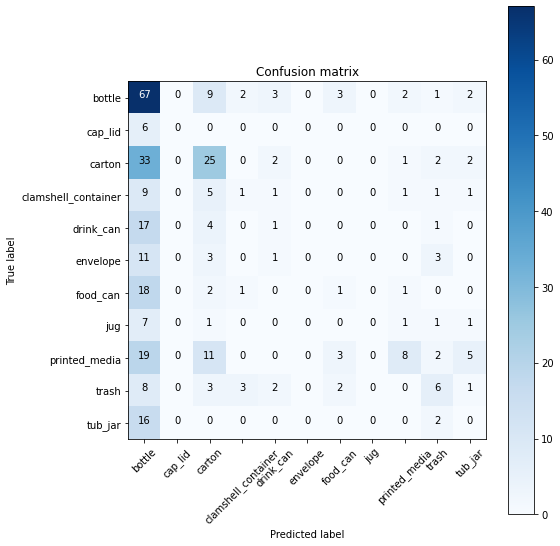

In [10]:
evaluate_model(
    model=robin_items_model(),
    class_names=items_dataset['class_names'],
    test_ds=items_test_ds,
    log_dir=items_log,
    training_tag=training_tag,
    cm_name="New Classifier For Items Model",
    log_false_images=False
)

In [ ]:
fine_tune_model(
    robin_items_model,
    items_hyperparams,
    items_dataset,
    log_dir=items_logdir,
    training_tag=training_tag,
    history=history
)

Fine tuning
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280) 

In [ ]:
evaluate_model(
    model=robin_items_model(),
    class_names=items_dataset['class_names'],
    test_ds=items_test_ds,
    log_dir=items_log,
    training_tag=training_tag,
    cm_name="Fine Tune Items Model",
    log_false_images=False
)